In [1]:
import torch
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt
import cv2
import numpy as np
import matplotlib.patches as patches
from torchvision import transforms
from dataloader import boundingBoxClothes
from torchvision.models import resnet18
import torch.optim as optim
import torchvision
from tqdm import tqdm

c:\users\vijsh\appdata\local\programs\python\python37\lib\site-packages\gluoncv\__init__.py:40: UserWarning: Both `mxnet==1.7.0` and `torch==1.10.1+cu113` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [2]:
LR = 0.0002
batch_size = 64
device = torch.device('cpu')

In [3]:
dataset = boundingBoxClothes("C:\\Users\\vijsh\\Documents\\HTN2022\\downloads", transforms.ToTensor())

In [4]:
train_set, test_set = torch.utils.data.random_split(dataset, [100, 74])

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True)

In [3]:
model = resnet18(pretrained=True)
model.fc = torch.nn.Sequential(
    torch.nn.Linear(512, 1),
    torch.nn.Sigmoid(),
)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [7]:
criterion = torch.nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

In [8]:
lossList = []

for epoch in range(10):  # loop over the dataset multiple times
    totalLoss = 0
    totalImages = 0
    for i, dataFrame in enumerate(tqdm(train_loader)):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = dataFrame
        inputs, labels = inputs.to(device), labels.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs.flatten(), labels.to(torch.float))
        loss.backward()
        optimizer.step()
        
        totalImages += len(labels)
        totalLoss += loss.item()

        # print statistics
    print(totalLoss/totalImages)
    lossList.append(totalLoss/totalImages)

print('Finished Training')

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [02:52<00:00, 86.46s/it]


0.013026122450828553


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [02:49<00:00, 84.55s/it]


0.0026613699644804003


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [02:47<00:00, 83.96s/it]


0.0009641946107149124


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [02:49<00:00, 84.87s/it]


0.0004366758093237877


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [02:44<00:00, 82.48s/it]


0.00020150285214185715


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [02:39<00:00, 79.68s/it]


9.750133845955133e-05


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [02:37<00:00, 78.77s/it]


6.164617603644729e-05


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [02:37<00:00, 78.87s/it]


6.429860834032297e-05


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [02:36<00:00, 78.18s/it]


2.9002780793234705e-05


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [02:40<00:00, 80.17s/it]

2.2520156344398858e-05
Finished Training


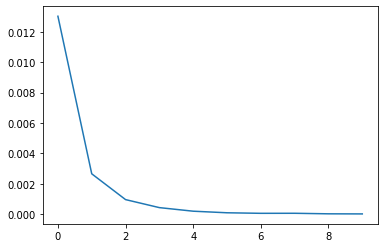

In [9]:
plt.plot(lossList)

In [14]:
torch.save(model.state_dict(), "good.pt")

In [11]:
valLossList = []

correct = 0
total = 0

model.eval()
for i, dataFrame in enumerate(tqdm(test_loader)):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = dataFrame
        inputs, labels = inputs.to(device), labels.to(device)

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs.flatten(), labels.to(torch.float))

        # print statistics
        valLossList.append(loss.item())
        
        for i,output in enumerate(outputs.flatten()):
            rounded = 0
            if output > 0.7:
                rounded = 1
            
            if rounded == labels[i]:
                correct += 1
                
            total += 1
        

 50%|█████████████████████████████████████████▌                                         | 1/2 [01:56<01:56, 116.24s/it]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [02:12<00:00, 66.41s/it]

yes
yes


In [12]:
print(correct/total)

0.7162162162162162


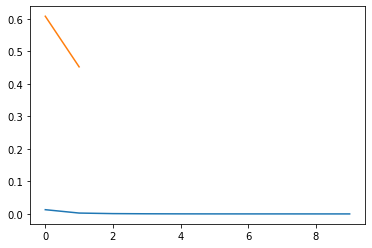

In [13]:
plt.plot(lossList)
plt.plot(valLossList)
plt.show()

In [4]:
model.load_state_dict(torch.load('good.pt'))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [3]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

In [45]:
x, img = data.transforms.presets.yolo.load_test('IMG_5045 Large.jpeg', short=512)
class_IDs, scores, bounding_boxs = net(x)

idx = 0
for i, val in enumerate(class_IDs[0]):
    if val == 14:
        idx = i
        break

bbox = bounding_boxs[0][idx]
crop_img = img[int(bbox[1].asscalar()):int(bbox[3].asscalar()), int(bbox[0].asscalar()):int(bbox[2].asscalar())]

In [46]:
resized = cv2.resize(crop_img,(192, 256))

In [47]:
converter = transforms.ToTensor()
tensorResized = converter(resized)

In [48]:
model(converter(tensorResized.numpy().transpose(2, 1, 0))[None,...].to(device))

tensor([[0.7098]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [50]:
from flask import Flask

In [7]:
model = torch.load('model.pth')

In [10]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [51]:
torch.save(model, 'model.pth')

In [52]:
torch.save(net, 'net.pth')

In [1]:
from predict import predict

c:\users\vijsh\appdata\local\programs\python\python37\lib\site-packages\gluoncv\__init__.py:40: UserWarning: Both `mxnet==1.7.0` and `torch==1.10.1+cu113` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [2]:
predict('IMG_5045 Large.jpeg')

'NOT'

In [4]:
!python --version

Python 3.7.9


In [6]:
import pickle

In [11]:
with open('net.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(yolo, file)

UnsupportedOperation: write

In [4]:
yolo = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in C:\Users\vijsh/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-9-17 Python-3.7.9 torch-1.10.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
torch.save(yolo, 'yolo.pt')

In [12]:
with open('net.pkl', 'rb') as file:
      
    # A new file will be created
    yolo = pickle.load(file)

In [49]:
testImage = cv2.imread("testIMG.jpg")

In [50]:
results = yolo(testImage)

In [51]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 720x1280 2 persons
Speed: 5.0ms pre-process, 45.4ms inference, 2.3ms NMS per image at shape (1, 3, 384, 640)

In [52]:
bboxTest = results.xyxy[0]  # img1 predictions (tensor)

In [53]:
bestBox = None
highestVal = 0
for box in bboxTest:
    if box[5] == 0 and box[4] > highestVal:
        bestBox = box 

In [58]:
bboxTest

tensor([[4.07548e+02, 5.26204e+01, 7.99937e+02, 6.78689e+02, 9.16360e-01, 0.00000e+00],
        [1.65047e+00, 4.09925e+02, 3.50997e+02, 7.13194e+02, 3.48486e-01, 0.00000e+00]], device='cuda:0')

In [54]:
bestBox[0].item()

1.6504669189453125

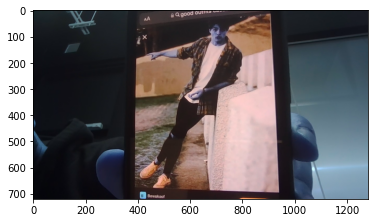

In [55]:
plt.imshow(testImage)
cropped_img = testImage[int(bestBox[1].item()):int(bestBox[3].item()), int(bestBox[0].item()):int(bestBox[2].item())]

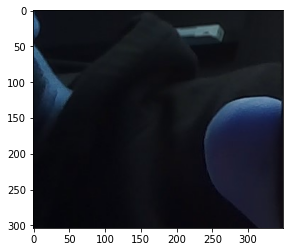

In [57]:
plt.imshow(cropped_img)

In [2]:
from predict import predict

In [3]:
testImage = cv2.imread("workpls.jpeg")
predict(testImage)

ModuleNotFoundError: No module named 'models'